In [1]:
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt

Let's query the Vizier database to retrieve the ZFOURGE data. The ZFOURGE data is split into three fields: CDFS, COSMOS, and UDS. Each field contains multiple catalogs. The catalogs are as follows:

- [J/ApJ/830/51/zf_cdfs](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cdfs) - CDFS photometric catalog (30911 rows)
- [J/ApJ/830/51/zf_cosmos](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cosmos) - COSMOS photometric catalog (20786 rows)
- [J/ApJ/830/51/zf_uds](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_uds) - UDS photometric catalog (22093 rows)
- [J/ApJ/830/51/cdfsz](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfsz) - CDFS EAZY photometric redshift catalog and spectroscopic redshifts (cdfszout and cdfszsp) (30911 rows)
- [J/ApJ/830/51/cdfssfr](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfssfr) - CDFS FAST stellar population catalog and star-formation rates (cdfsfout and cdfs_sfr) (30911 rows)
- [J/ApJ/830/51/cdfsxmatch](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfsxmatch) - CDFS 3D-HST and vdW14 (van der Wel+, 2014ApJ...788...28V) crossmatch and AGN flags (cdfs3dhst, cdfsvdw, and cdfsagn) (30911 rows)
- [J/ApJ/830/51/cdfsflux](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfsflux) - CDFS rest-frame and radio and X-ray fluxes (cdfsrest, cdfsrad, and cdfsx) (30911 rows)
- [J/ApJ/830/51/cdfs_her](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cdfs_her) - CDFS far-infrared catalog (cdfs.v1.6.9.herschel.v0.4.cat) (30911 rows)
- [J/ApJ/830/51/cosmosz](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosmosz) - COSMOS EAZY photometric redshift catalog and spectroscopic redshifts (cos_zout and coszsp) (20786 rows)
- [J/ApJ/830/51/cosmossfr](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosmossfr) - COSMOS FAST stellar population catalog and star-formation rates (cos_fout and cos_sfr) (20786 rows)
- [J/ApJ/830/51/cosxmatch](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosxmatch) - COSMOS 3D-HST and vdW14 (van der Wel+, 2014ApJ...788...28V) crossmatch and AGN flags (cos3dhst, cosvdw, and cosagn) (Note) (20786 rows)
- [J/ApJ/830/51/cosflux](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosflux) - COSMOS rest-frame and radio and X-ray fluxes (cosrest, cosrad, and cosx) (20786 rows)
- [J/ApJ/830/51/cosmosx](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/cosmosx) - COSMOS X-ray flux (Note) (20786 rows)
- [J/ApJ/830/51/udsz](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/udsz) - UDS EAZY photometric redshift catalog and spectroscopic redshifts (cdfszout and cdfszsp) (22093 rows)
- [J/ApJ/830/51/udssfr](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/udssfr) - UDS FAST stellar population catalog and star-formation rates (uds_fout and uds_sfr) (22093 rows)
- [J/ApJ/830/51/udsxmatch](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/udsxmatch) - UDS 3D-HST and vdW14 (van der Wel+, 2014ApJ...788...28V) crossmatch and AGN flags (uds3dhst, udsvdw, and udsagn) (22093 rows)
- [J/ApJ/830/51/udsflux](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/udsflux) - UDS rest-frame and radio and X-ray fluxes (udsrest, udsrad, and udsx) (22093 rows)

As an example, let's query the CDFS stellar population catalog, which should contain the stellar masses and star-formation rates of the galaxies in the CDFS field.


In [2]:
catalog = "J/ApJ/830/51/cdfssfr" # Change this to the catalog you want to query
columns = ['**']  # You can specify the columns you want to retrieve, here we retrieve all columns with the wildcard
result = Vizier(columns=columns, row_limit=-1).query_constraints(catalog=catalog)[0] # No constraints and retrieve all rows
data = result.to_pandas() # Convert to Pandas DataFrame
print(data)

       recno    Seq       z  ltau  Metal  lage   Av  lmass  lsfr  lssfr  la2t  \
0          1      1  0.6141   9.0   0.02   9.7  0.5  11.56  0.65 -10.91   0.7   
1          2      2  0.4320   7.2   0.02   8.0  0.9   9.05 -0.74  -9.79   0.8   
2          3      3  0.9509   8.8   0.02   9.2  1.2  10.42  0.78  -9.64   0.4   
3          4      4  3.8117  11.0   0.02   7.5  0.0  11.83  4.39  -7.44  -3.5   
4          5      5  4.8741  11.0   0.02   7.5  0.4  10.51  3.07  -7.44  -3.5   
...      ...    ...     ...   ...    ...   ...  ...    ...   ...    ...   ...   
30906  30907  30907  2.4449   8.0   0.02   8.5  0.0  10.08  0.89  -9.19   0.5   
30907  30908  30908  1.0816   8.8   0.02   9.6  1.0  10.56 -0.72 -11.28   0.8   
30908  30909  30909  3.0815   7.8   0.02   8.3  0.0   9.60  0.60  -9.00   0.5   
30909  30910  30910  2.3433   8.0   0.02   8.6  0.0   9.46 -0.08  -9.54   0.6   
30910  30911  30911  2.2773   8.8   0.02   8.6  0.0   9.50  0.92  -8.59  -0.2   

            chi2     zPk   

In [3]:
# Inspect the columns
print(data.columns)

Index(['recno', 'Seq', 'z', 'ltau', 'Metal', 'lage', 'Av', 'lmass', 'lsfr',
       'lssfr', 'la2t', 'chi2', 'zPk', 'F24', 'e_F24', 'LIR', 'L2800', 'SFR',
       'e_SFR', 'E_SFR'],
      dtype='object')


One of the activities I get new research students to perform is to plot the mass vs redshift. This is a common plot in astronomy and can reveal interesting trends. Let's plot this now for the CDFS catalog.

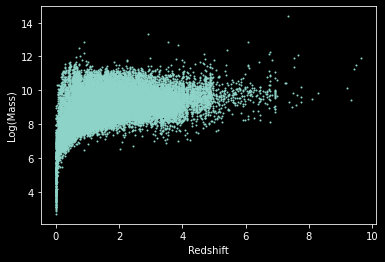

In [4]:
mass_cdfs = data['lmass'] # Stellar mass column
z_cdfs = data['z'] # Redshift column

plt.style.use('dark_background') # Dark theme
plt.scatter(z_cdfs, mass_cdfs, s=1) # Scatter plot
plt.xlabel('Redshift')
plt.ylabel('Log(Mass)')
plt.show()

Let's mask the data to ensure we have selected a "standard selection" of galaxies or "use==1" as detailed in the Straatman et al. 2016 paper. The use flag is in the zf_cdfs catalog.

In [5]:
use_catalog = "J/ApJ/830/51/zf_cdfs" # Use catalog
use_columns = ['Seq', 'use'] # We grab the sequence number as well to cross-reference with the CDFS catalog
use_result = Vizier(columns=use_columns, row_limit=-1).query_constraints(catalog=use_catalog)[0]
use_data = use_result.to_pandas()
print(use_data)

         Seq  Use
0          1    0
1          2    0
2          3    0
3          4    0
4          5    0
...      ...  ...
30906  30907    0
30907  30908    1
30908  30909    0
30909  30910    1
30910  30911    0

[30911 rows x 2 columns]


Let's cross-reference the use flag with the CDFS catalog to ensure we are selecting the correct galaxies. We will do this by indexing the dataframes by the sequence number and then joining the two dataframes.

In [6]:
use_data = use_data.set_index('Seq') # Use data is now indexed by Seq
data = data.set_index('Seq') # CDFS data is now indexed by Seq
# Now we can join the two dataframes
data = data.join(use_data, how='inner')
print(data) # Note the use column has been added at the end

       recno       z  ltau  Metal  lage   Av  lmass  lsfr  lssfr  la2t  \
Seq                                                                      
1          1  0.6141   9.0   0.02   9.7  0.5  11.56  0.65 -10.91   0.7   
2          2  0.4320   7.2   0.02   8.0  0.9   9.05 -0.74  -9.79   0.8   
3          3  0.9509   8.8   0.02   9.2  1.2  10.42  0.78  -9.64   0.4   
4          4  3.8117  11.0   0.02   7.5  0.0  11.83  4.39  -7.44  -3.5   
5          5  4.8741  11.0   0.02   7.5  0.4  10.51  3.07  -7.44  -3.5   
...      ...     ...   ...    ...   ...  ...    ...   ...    ...   ...   
30907  30907  2.4449   8.0   0.02   8.5  0.0  10.08  0.89  -9.19   0.5   
30908  30908  1.0816   8.8   0.02   9.6  1.0  10.56 -0.72 -11.28   0.8   
30909  30909  3.0815   7.8   0.02   8.3  0.0   9.60  0.60  -9.00   0.5   
30910  30910  2.3433   8.0   0.02   8.6  0.0   9.46 -0.08  -9.54   0.6   
30911  30911  2.2773   8.8   0.02   8.6  0.0   9.50  0.92  -8.59  -0.2   

            chi2     zPk       F24   

With the two dataframes joined, we can now mask the data using the use flag. We will plot the masked data alongside the unmasked data for comparison.

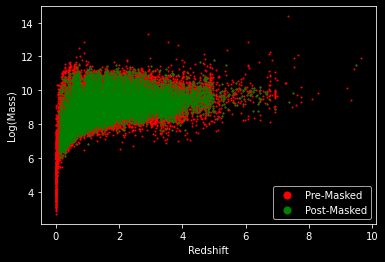

In [7]:
# Mask the data with Use==1 (i.e., standard selection of "good" galaxies)
mass_cdfs_masked = data.loc[data['Use'] == 1, 'lmass']
z_cdfs_masked = data.loc[data['Use'] == 1, 'z']

# We'll also include the pre-masked plot for comparison
plt.scatter(z_cdfs, mass_cdfs, s=1, color='red', label='Pre-Masked')
plt.scatter(z_cdfs_masked, mass_cdfs_masked, s=1, color='green', label='Post-Masked')
plt.xlabel('Redshift')
plt.ylabel('Log(Mass)')
legend = plt.legend(markerscale=5)  # Adjust marker scale
for handle in legend.legendHandles:
    handle.set_sizes([50])
plt.show()


There you have it! A simple example of querying the Vizier database to retrieve the ZFOURGE data and then masking the data to select a "standard selection" of galaxies. To save frequently downloading the data, you are encouraged to either save your data locally or access the catalogs from the ZFOURGE website https://mjcowley.github.io/zfourge/.